In [29]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
#Leer archivo google maps
df_googlet=pd.read_parquet('/Users/florencialuppi/Desktop/DS/Proyecto Final DSlocal/df_google_metadata0.parquet')


In [31]:
df_googlet.head()

,name,gmap_id,category,avg_rating,num_of_reviews,state,Delivery
0,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Korean restaurant,4.4,18,California,1
1,Vons Chicken,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Restaurant,4.5,18,California,1
2,"Sweet Rewards Gluten Free Bakery, LLC",0x87ec235c54d25b31:0x3b75fb5facc602f,"Bakery, Health food restaurant",4.7,21,Iowa,1
3,Golden Castle,0x8644b59b8fe872e5:0x5e638876caa84cc3,Restaurant,4.5,8,Texas,1
4,TACOS LA CABANA,0x808f879f35b5088b:0xe3541cec7a95bd88,Taco restaurant,5.0,2,California,0


In [32]:
df_googlet.shape

(52635, 7)

In [33]:
df_googlet.columns

Index(['name', 'gmap_id', 'category', 'avg_rating', 'num_of_reviews', 'state',
       'Delivery'],
      dtype='object')

In [34]:
df_googlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52635 entries, 0 to 52634
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            52635 non-null  object 
 1   gmap_id         52635 non-null  object 
 2   category        52635 non-null  object 
 3   avg_rating      52635 non-null  float64
 4   num_of_reviews  52635 non-null  int64  
 5   state           52635 non-null  object 
 6   Delivery        52635 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.8+ MB


In [35]:
df_googlet.describe()

,avg_rating,num_of_reviews,Delivery
count,52635.000000,52635.000000,52635.000000
mean,4.184089,68.602223,0.887850
std,0.554801,129.298698,0.315554
min,1.000000,1.000000,0.000000
25%,3.900000,16.000000,1.000000
50%,4.300000,38.000000,1.000000
75%,4.600000,78.000000,1.000000
max,5.000000,4379.000000,1.000000


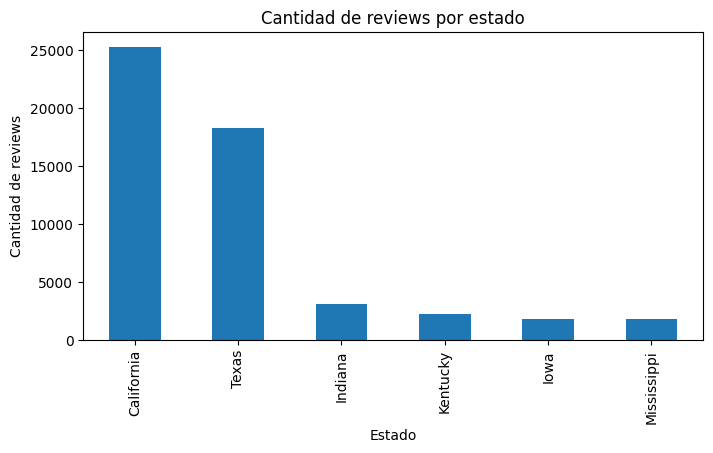

In [46]:
#Graficar de barras cantidad de reviews por estados
df_googlet['state'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title('Cantidad de reviews por estado')
plt.ylabel('Cantidad de reviews')
plt.xlabel('Estado')
plt.show()




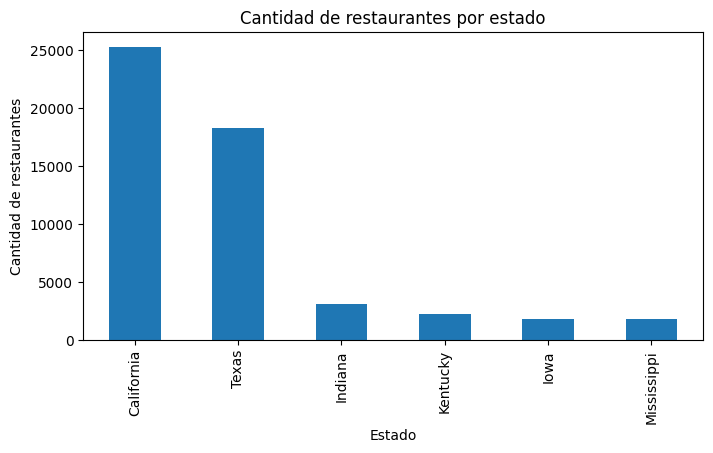

In [48]:
#Graficar cantidad de restaurantes (gmap_id) por estado


# Agrupar por estado y contar el número de restaurantes únicos (gmap_id) por estado
restaurantes_por_estado = df_googlet.groupby('state')['gmap_id'].nunique()

# Ordenar los estados de mayor a menor según la cantidad de restaurantes
restaurantes_por_estado = restaurantes_por_estado.sort_values(ascending=False)

# Crear el gráfico de barras ordenado
plt.figure(figsize=(8, 4))
restaurantes_por_estado.plot(kind='bar')
plt.title('Cantidad de restaurantes por estado')
plt.ylabel('Cantidad de restaurantes')
plt.xlabel('Estado')
plt.show()



In [38]:
#contar cantidad de category
df_googlet['category'].value_counts()





category
Restaurant                                                                                  10431
Mexican restaurant                                                                           4161
Sandwich shop, Caterer, Fast food restaurant, Takeout Restaurant, Restaurant                 2009
Pizza restaurant                                                                             1306
Chinese restaurant                                                                           1191
                                                                                            ...  
Middle Eastern restaurant, Delivery Restaurant                                                  1
Fondue restaurant, Swiss restaurant                                                             1
Sports bar, Bar & grill, Concert hall, Karaoke, Live music venue, Night club, Restaurant        1
Restaurant, Bar, Cocktail bar, Live music venue                                                 1
Mexican res

In [40]:
#contar cantidad de restaurants por estado
df_googlet.groupby('state')['gmap_id'].nunique()


state
California     25312
Indiana         3141
Iowa            1846
Kentucky        2249
Mississippi     1795
Texas          18292
Name: gmap_id, dtype: int64

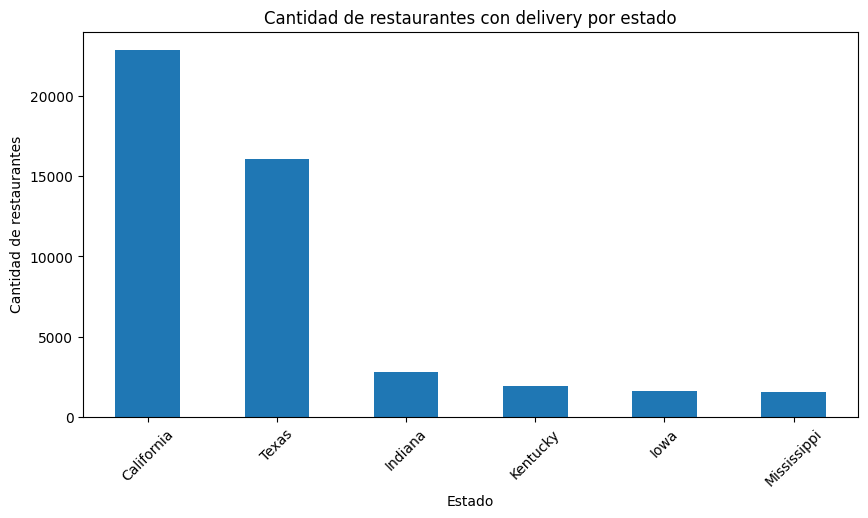

In [41]:
#graficar cantidad de restaurantes que tienen delivery con valor 1

# Filtrar el DataFrame para obtener solo los restaurantes con delivery igual a 1
df_delivery = df_googlet[df_googlet['Delivery'] == 1]

# Contar la cantidad de restaurantes con delivery igual a 1 por estado
delivery_counts = df_delivery['state'].value_counts()

# Graficar la cantidad de restaurantes con delivery igual a 1 por estado
plt.figure(figsize=(10, 5))
delivery_counts.plot(kind='bar')
plt.title('Cantidad de restaurantes con delivery por estado')
plt.ylabel('Cantidad de restaurantes')
plt.xlabel('Estado')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()




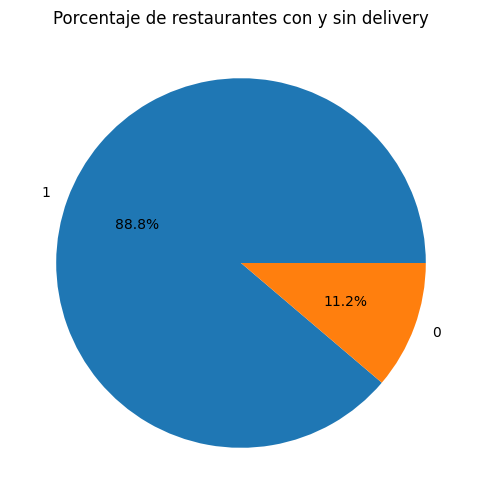

In [49]:
# grafico de torta Contar la cantidad de restaurantes con y sin delivery
df_googlet['Delivery'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Porcentaje de restaurantes con y sin delivery')
plt.ylabel('')
plt.show()




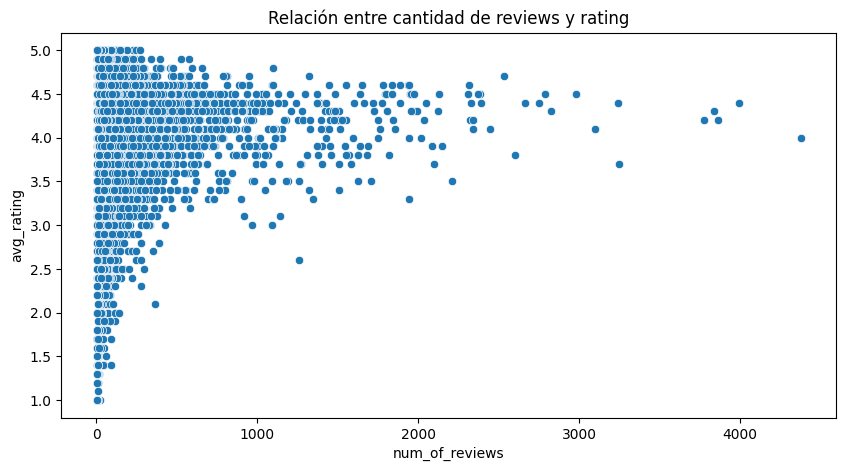

In [45]:
#graficar relacion entre num of reviews y rating
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_googlet, x='num_of_reviews', y='avg_rating')
plt.title('Relación entre cantidad de reviews y rating')
plt.show()


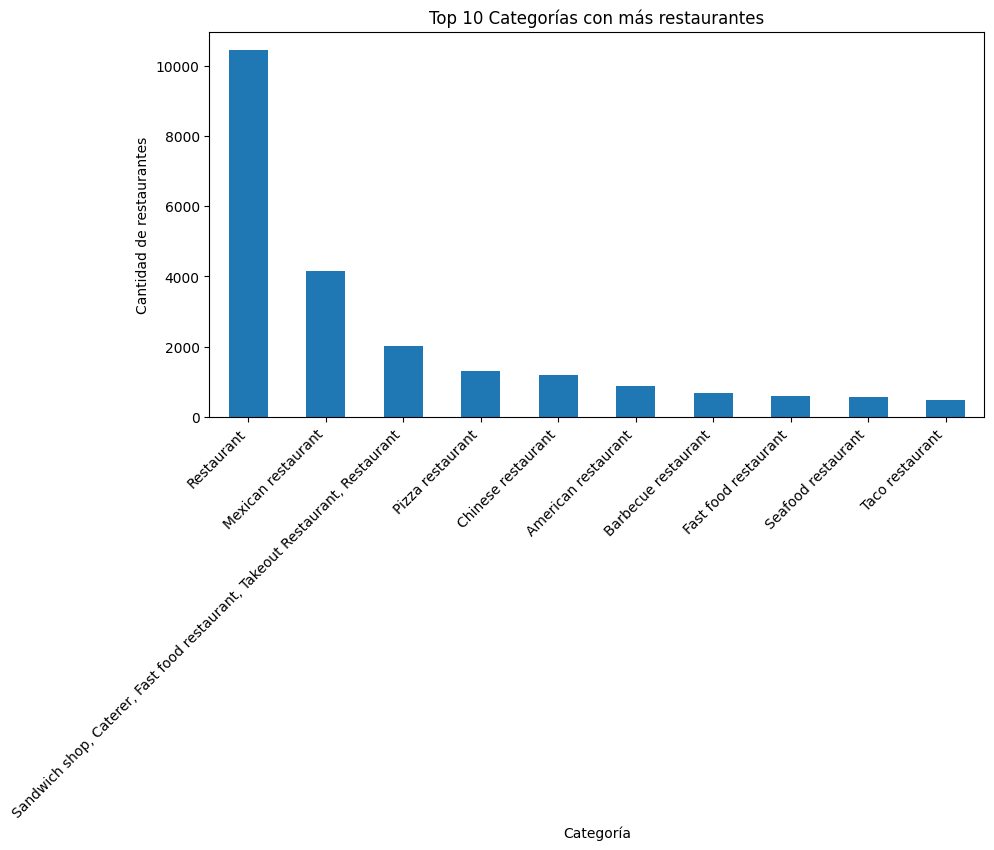

In [50]:


# Agrupar por categoría y contar el número de restaurantes únicos (gmap_id) por categoría
categorias_mas_frecuentes = df_googlet.groupby('category')['gmap_id'].nunique()

# Ordenar las categorías de mayor a menor según la cantidad de restaurantes
categorias_mas_frecuentes = categorias_mas_frecuentes.sort_values(ascending=False)

# Tomar las 10 categorías con más restaurantes
top_10_categorias = categorias_mas_frecuentes.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_10_categorias.plot(kind='bar')
plt.title('Top 10 Categorías con más restaurantes')
plt.ylabel('Cantidad de restaurantes')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.show()



In [51]:
#avg_raiting de todos los restaurantes
df_googlet['avg_rating'].mean()


4.184088534245274